In [2]:
# This notebook provides a four-stock equity portfolio analysis focused on returns, risk metrics, performance metrics and efficient-frontier optimisation.
# Raw data consist of daily prices from 2012 to 2017 and are downloaded from Yahoo Finance.

In [3]:
# Link to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd              # Analysis and tables
import matplotlib.pyplot as plt  # Charts

In [5]:
# Link to file xlsx
Portfolio_Analysis = '/content/drive/MyDrive/Financial Analysis/Portfolio Analysis.xlsx'
raw_data = pd.read_excel(Portfolio_Analysis)

# Head shows the first 5 rows of the Dataframe
raw_data.head()

,date,open,high,low,close,adj_close,volume,symbol
0,2012-09-04,40.939999,41.000000,40.520000,40.779999,34.196461,1056700.0,SNY
1,2012-09-05,41.160000,41.270000,40.910000,40.980000,34.364166,1477400.0,SNY
2,2012-09-06,41.549999,42.299999,41.549999,42.279999,35.454300,3040100.0,SNY
3,2012-09-07,42.450001,42.450001,42.110001,42.400002,35.554928,2646500.0,SNY
4,2012-09-10,41.990002,42.130001,41.689999,41.700001,34.967934,1064500.0,SNY


In [6]:
# Sheet= "Data" -> Prezzi di chiusura (close) pivotati

# Read data from the specified sheet
raw_data_sheet=pd.read_excel(Portfolio_Analysis, sheet_name="Raw Data")

# Pivot the dataframe
pivoted_raw_data=raw_data_sheet.pivot(index='date', columns='symbol', values='close')

# print (pivoted_raw_data)

# Pivot only tha dataframe of APPL, AMZN, BRK-A, ABB
pivoted_raw_data_filtered=pivoted_raw_data[['AAPL', 'AMZN', 'BRK-A', 'ABB']]

print (pivoted_raw_data_filtered)

symbol            AAPL        AMZN     BRK-A        ABB
date                                                   
2012-09-04   96.424286  247.880005  126279.0  17.240000
2012-09-05   95.747147  246.220001  127770.0  17.320000
2012-09-06   96.610001  251.380005  129597.0  17.910000
2012-09-07   97.205711  259.140015  129942.0  18.650000
2012-09-10   94.677139  257.089996  129700.0  18.540001
...                ...         ...       ...        ...
2017-08-28  161.470001  946.020020  268035.0  23.070000
2017-08-29  162.910004  954.059998  268090.0  22.920000
2017-08-30  163.350006  967.590027  270420.0  22.840000
2017-08-31  164.000000  980.599976  271450.0  23.180000
2017-09-01  164.050003  978.250000  271062.0  23.260000

[1258 rows x 4 columns]


In [7]:
# Calculate % daily return of portfolio stocks -> r=(Pt/Pt-1)-1 * 100, Pt and Pt-1=close prices

close_return=pivoted_raw_data_filtered.pct_change()*100
print (close_return)

symbol          AAPL      AMZN     BRK-A       ABB
date                                              
2012-09-04       NaN       NaN       NaN       NaN
2012-09-05 -0.702249 -0.669680  1.180719  0.464037
2012-09-06  0.901180  2.095688  1.429913  3.406467
2012-09-07  0.616613  3.086964  0.266210  4.131770
2012-09-10 -2.601259 -0.791085 -0.186237 -0.589807
...              ...       ...       ...       ...
2017-08-28  1.007131  0.080402 -0.639826 -1.029597
2017-08-29  0.891808  0.849874  0.020520 -0.650195
2017-08-30  0.270089  1.418153  0.869111 -0.349040
2017-08-31  0.397915  1.344572  0.380889  1.488616
2017-09-01  0.030490 -0.239647 -0.142936  0.345125

[1258 rows x 4 columns]


In [8]:
# Calculate % daily weighted return -> r*w, w=weights

# Calculate % daily weighted return -> r*w, w=weights
# 1) array + function mul -> multiplies each data in dataframe with a specified value. Ensure that the order of the weights coincides with the order of the columns of dataframe. 1° weight -> 1° column = AAPL, 2° weight -> 2° column = AMZN, etc.

weight_AAPL=0.5
weight_AMZN=0.2
weight_BRK_A=0.2
weight_ABB=0.1

weighted_close_return_1=close_return.mul([weight_AAPL, weight_AMZN, weight_BRK_A, weight_ABB])

print (weighted_close_return_1)

# 2) index series + mul -> multiplies weights with returns using column labels/headers

# Explanation (eng): Pandas aligns on the column labels, so each weight is broadcast only to the column with the same name, independent of order. This guarantees correct, label-aware multiplication even if the columns are shuffled or some symbols are absent.
# Explanation (ita): Pandas allinea i pesi sulle etichette di colonna, per cui ogni peso viene applicato solo alla colonna con lo stesso nome, indipendentemente dall’ordine. In questo modo la moltiplicazione è sicura e basata sulle etichette, anche se le colonne sono riordinate o mancano alcuni simboli.

weights= pd.Series({'AAPL':0.5, 'AMZN':0.2, 'BRK-A':0.2,'ABB':0.1})

weighted_close_return_2=close_return.mul(weights, axis=1) # axis= 1 -> aligns on column names

print (weighted_close_return_2)


symbol          AAPL      AMZN     BRK-A       ABB
date                                              
2012-09-04       NaN       NaN       NaN       NaN
2012-09-05 -0.351125 -0.133936  0.236144  0.046404
2012-09-06  0.450590  0.419138  0.285983  0.340647
2012-09-07  0.308307  0.617393  0.053242  0.413177
2012-09-10 -1.300629 -0.158217 -0.037247 -0.058981
...              ...       ...       ...       ...
2017-08-28  0.503566  0.016080 -0.127965 -0.102960
2017-08-29  0.445904  0.169975  0.004104 -0.065020
2017-08-30  0.135044  0.283631  0.173822 -0.034904
2017-08-31  0.198957  0.268914  0.076178  0.148862
2017-09-01  0.015245 -0.047929 -0.028587  0.034513

[1258 rows x 4 columns]
symbol          AAPL      AMZN     BRK-A       ABB
date                                              
2012-09-04       NaN       NaN       NaN       NaN
2012-09-05 -0.351125 -0.133936  0.236144  0.046404
2012-09-06  0.450590  0.419138  0.285983  0.340647
2012-09-07  0.308307  0.617393  0.053242  0.413177
2012-0

In [9]:
# Calculate daily performance portfolio -> sum of weighted returns

# sum "across" namely along the rows. axis=0 (or omitted): sum "down" namely along the columns.
# axis=0 is the default, so .sum() moves vertically through each column and returns a single total per symbol for the whole period.
# axis=1 moves horizontally through each row and adds the values of all columns, giving a single figure per date, namely the daily portfolio return.
# Because your DataFrame stores dates as rows and asset returns as columns, you must use sum(axis=1) to obtain the portfolio’s day-by-day performance.

perf_ptf=weighted_close_return_2.sum(axis=1)
print (perf_ptf)

date
2012-09-04    0.000000
2012-09-05   -0.202513
2012-09-06    1.496357
2012-09-07    1.392118
2012-09-10   -1.555075
                ...   
2017-08-28    0.288721
2017-08-29    0.554963
2017-08-30    0.557593
2017-08-31    0.692911
2017-09-01   -0.026759
Length: 1258, dtype: float64


In [10]:
# Calculate daily portfolio values, namely portfolio time-series -> ptf_value(t)=ptf_value(t-1)*(1+perf_ptf)

ptf_value_0=100_000

# Convert percentage series to decimal
perf_ptf_dec=perf_ptf/100

print (perf_ptf_dec)

# .cumprod() chains ptf_value_0 and perf_ptf_dec: multiplying each new day’s growth factor by all previous ones to create a running growth multiplier (moltiplicatore di crescita cumulato). It returns the portfolio trend day-by-day
# Multipling the cumulative products of growth factors by perf_ptf_0​: the result is the portfolio value for every date.

ptf_value_t=ptf_value_0*(1+perf_ptf_dec).cumprod()

print (ptf_value_t)



date
2012-09-04    0.000000
2012-09-05   -0.002025
2012-09-06    0.014964
2012-09-07    0.013921
2012-09-10   -0.015551
                ...   
2017-08-28    0.002887
2017-08-29    0.005550
2017-08-30    0.005576
2017-08-31    0.006929
2017-09-01   -0.000268
Length: 1258, dtype: float64
date
2012-09-04    100000.000000
2012-09-05     99797.486678
2012-09-06    101290.813240
2012-09-07    102700.901227
2012-09-10    101103.825679
                  ...      
2017-08-28    216141.969926
2017-08-29    217341.478798
2017-08-30    218553.360276
2017-08-31    220067.741383
2017-09-01    220008.852929
Length: 1258, dtype: float64


In [11]:
# Calculate absolute return, namely prices changes of portfolio

ptf_value_t_abs_return=ptf_value_t.diff().fillna(0)

# ptf_value_t.diff() computes the change between each entry and the one immediately before it in the Series. By default diff() uses periods=1, so it does xt−xt−1​. The first element has no predecessor, so the result is NaN.
# Handy options: for example, diff(7) gives the change versus seven days earlier (weekly swing).
# You can replace the initial NaN with zero via .fillna(0)

print (ptf_value_t_abs_return)

date
2012-09-04       0.000000
2012-09-05    -202.513322
2012-09-06    1493.326562
2012-09-07    1410.087987
2012-09-10   -1597.075547
                 ...     
2017-08-28     622.251241
2017-08-29    1199.508872
2017-08-30    1211.881477
2017-08-31    1514.381107
2017-09-01     -58.888454
Length: 1258, dtype: float64


In [12]:
# Calculate Value of portfolio in the last date

# 1) Cumprod method

ptf_value_last_date_cumprod= ptf_value_0*(1+perf_ptf_dec).cumprod().iloc[-1]

#  .iloc selects rows by integer position; index -1 means “last row” of the DataFrame/Series, namely the cumulative growth factor at final date.

print (f" ptf_value_last_date_cumprod: € {ptf_value_last_date_cumprod:,.2f}")

# 2) CAGR method -> Compound Annual Growth Rate -> M=C(1+CAGR)^t -> CAGR= [(M/C)^(1/t)]-1

days= perf_ptf_dec.shape[0]

# shape returns a tuple representing dimensions (rows= records, columns= attributes) of the dataframe. shape[0] is the row count → in this case, total trading days.

# print (days)

years= (perf_ptf_dec.index[-1] - perf_ptf_dec.index[0]).days / 365.25

# Subtracts the first date [0] from the last [-1] to get a timedelta that has some attributes: days, minutes, seconds, microseconds so .days returns elapsed (trascorsi) days with integer number. Divided by 365.25 (average year length) to convert to decimal years.

# print (f"{years:.2f}")

total_return= (1 + perf_ptf_dec).prod() - 1

# .prod() computes the product of all elements along the chosen axis (default: column).
# (1+perf_ptf_dec).prod = product of daily growth factors= cumulative growth factor. Subtracting 1 you obtain cumulative return or total return or M/C-1.

# print (f"{total_return:.2%}")

CAGR= (1 + total_return) ** (1 / years) - 1 # CAGR=[(tot. return +1)^(1/t)]-1

# print (f"{CAGR:.2%}")

ptf_value_last_date_CAGR= ptf_value_0*(1+CAGR)**years

print (f" ptf_value_last_date_CAGR: € {ptf_value_last_date_CAGR:,.2f}")

# 3) Daily arithmetic mean method

mu= perf_ptf_dec.mean()

# print (f"{mu:.4%}")

ptf_value_last_date_mu= ptf_value_0* (1 + mu) ** days

print (f"ptf_value_last_date_mu: € {ptf_value_last_date_mu:,.2f}")


 ptf_value_last_date_cumprod: € 220,008.85
 ptf_value_last_date_CAGR: € 220,008.85
ptf_value_last_date_mu: € 236,736.48


In [13]:
# Other computations

# 1) % Total return -> ptf_value_last_date/ptf_value_first_date - 1 -> % cumulative change

total_return_pct=((ptf_value_last_date_cumprod/ptf_value_0)-1)

print (f"{total_return_pct:.2%}")

# '.2'= two significant digits after decimal points + '%'= multiplies *100 and appends '%' + no final leter -> 'general' format ('g')= 'g' prints the number in fixed-point or scientific notation—whichever keeps the result within the requested number of significant digits (not decimal places).

# 2) % Average return -> Arithmetic mean of daily portfolio weighted returns (perf_prt)

mean_perf_ptf=perf_ptf.mean()/100

print (f"{mean_perf_ptf:.2%}")

# '.2'= two significant digits after decimal points + '%'= multiplies *100 and appends '%' + no final leter -> 'general' format (g)

# 3) Volatility-> standard deviation of daily portfolio weighted return (perf_prt)

std_perf_ptf=perf_ptf.std()/100

print (f"{std_perf_ptf:.2}")

# '.2'= two significant digits after decimal points + no final leter -> 'general' format (g)

# 4) P/L (profit and loss) -> ptf_value_last_date - ptf_value_first_date

pnl= ptf_value_last_date_cumprod - ptf_value_0

print (f"€ {pnl:,.2f}")

# literal '€' prefix + ',' = thousands separator + '.2'= two significant digits after decimal points + f= fixed-point(prints the number exactly as it is, no ×100 conversion)

# Quick memo:

 # f= fixed-point: prints the number exactly as it is, no ×100 conversion; add the % yourself if you need it.
 # %= percentage: multiplies the value by 100, appends %, and respects the precision you set.
 # .2= in front of f or % → two digits after the decimal point; .2 with no letter means two significant digits (Python’s general format).
 # ,= before the dot enables the thousands separator.



120.01%
0.07%
0.011
€ 120,008.85


In [14]:
# Calculate yearly profit and loss and % total return

# 1. Ensure that index is a DataTimeIndex

ptf_value_t.index = pd.to_datetime(ptf_value_t.index)

# pd.to_datetime guarantees the index is treated as dates so that resampling works.

# 2. Grab the first and last portfolio value of every calendar year

ptf_value_t_yearly_first = ptf_value_t.resample('YE').first()
ptf_value_t_yearly_last  = ptf_value_t.resample('YE').last()

# Resample('YE') groups data by calendar year.

# 3. Compute yearly Profit & Loss (€) and Total Return (%)

pnl_yearly= ptf_value_t_yearly_last - ptf_value_t_yearly_first
total_return_pct_yearly= ptf_value_t_yearly_last / ptf_value_t_yearly_first - 1

# 4. Build a tidy summary table

yearly_metrics = pd.DataFrame({
    'ptf_value_t_start': ptf_value_t_yearly_first,
    'ptf_value_t_end': ptf_value_t_yearly_last,
    'P/L €': pnl_yearly,
    'Total Return %': total_return_pct_yearly * 100 })

print (yearly_metrics.round(2))


            ptf_value_t_start  ptf_value_t_end     P/L €  Total Return %
date                                                                    
2012-12-31          100000.00         92235.01  -7764.99           -7.76
2013-12-31           95110.78        114635.01  19524.22           20.53
2014-12-31          113306.23        133004.42  19698.19           17.38
2015-12-31          131888.46        147192.81  15304.35           11.60
2016-12-31          145163.10        169325.01  24161.91           16.64
2017-12-31          170146.46        220008.85  49862.39           29.31


In [15]:
# Find the date where value portfolio is max

max_date=ptf_value_t.idxmax()

# idxmax() returns the index label (in this case, the date) at which the Series reaches its maximum value.

print (max_date)

2017-08-31 00:00:00


In [16]:
# Save portfolio returns to CSV file directly to the specified path in Drive

perf_ptf_dec.to_csv('/content/drive/MyDrive/Financial Analysis/perf_ptf_dec.csv')



In [17]:
# Calculate logarithm returns

# 1. Import numpy library

import numpy as np

# 2. Calculate logarithm returns (log_returns) -> Lt=ln(Pt/Pt-1)=ln(Pt)-ln(Pt-1)

log_close_return= np.log(pivoted_raw_data_filtered).diff().dropna()

print (log_close_return)

# 3. Calculate weighted logarithm returns (log-returns)

log_weighted_close_return=log_close_return.mul(weights, axis=1)

print (log_weighted_close_return)

# 4. Calculate portfolio performance with logarithm returns

log_perf_ptf=log_weighted_close_return.sum(axis=1)

print (log_perf_ptf)

# 5. Cumulative log-return, simple return, and portfolio value

cum_log_return = log_perf_ptf.cumsum()                  # log-return to date
cum_simple_return = np.exp(cum_log_return) - 1          # # plain %, same dates


log_ptf_value_t= ptf_value_0 * np.exp(cum_log_return)

print (log_ptf_value_t)                                 # portfolio value in t

# 6. Other computations

# 6.1 Annualised mean return (method 1: average daily log * 252)

trading_days = 252
mean_daily_log_perf_ptf = log_perf_ptf.mean()                     # daily arithmetic mean of log returns
mean_yearly_log_perf_ptf = mean_daily_log_perf_ptf * trading_days # yearly arithmetic mean of log returns
yearly_simple_return = np.exp(mean_yearly_log_perf_ptf) - 1       # from log return (rt) to simple return (Rt)-> rt=ln(1+Rt) -> Rt=(e^rt)-1

# print (mean_yearly_log_perf_ptf)
# print (yearly_simple_return)


# 6.2 CAGR (method 2: true compound growth) -> good when the sample does not equal exactly one calendar year.

years = (log_perf_ptf.index[-1] - log_perf_ptf.index[0]).days / 365.25

total_log_return = cum_log_return.iloc[-1]   # last cumulative value of the series
cagr_log = total_log_return / years
cagr_simple = np.exp(cagr_log) - 1

# print (total_log_return)
# print (cagr_log)
# print (cagr_simple)

# 7. Summary report

log_metrics = pd.Series({
    'total_log_return': total_log_return,
    'cagr_log': cagr_log,
    'cagr_simple': cagr_simple,
    'mean_yearly_log_perf_ptf': mean_yearly_log_perf_ptf,
    'yearly_simple_return': yearly_simple_return})

print (log_metrics.to_string())


# Financial analysts rely on log-returns (ℓt=ln⁡(Pt/Pt−1)ℓt​=ln(Pt​/Pt−1​)) because they offer three key advantages over simple % returns:
  # Time additivity: Log-returns add up: ∑lt=ln(PT/P0). With simple returns you must multiply (1+rt) and subtract 1, which is less convenient for cumulative calculations or regressions.
  # Consistent with continuous compounding: A constant log-return ℓˉℓˉ converts directly into a continuously compounded rate eℓˉ-1. This matches the assumptions behind models such as Black–Scholes and many fixed-income formulas.
  # Cleaner statistical properties: Over short horizons log-returns are approximately symmetric and their variances add linearly, which simplifies volatility forecasts, VaR, and maximum-likelihood estimation. They also avoid the +∞ upper bound and –100 % lower bound that skew the distribution of simple returns.



symbol          AAPL      AMZN     BRK-A       ABB
date                                              
2012-09-05 -0.007047 -0.006719  0.011738  0.004630
2012-09-06  0.008971  0.020740  0.014198  0.033497
2012-09-07  0.006147  0.030403  0.002659  0.040487
2012-09-10 -0.026357 -0.007942 -0.001864 -0.005916
2012-09-11 -0.003249 -0.005539  0.003617  0.019231
...              ...       ...       ...       ...
2017-08-28  0.010021  0.000804 -0.006419 -0.010349
2017-08-29  0.008879  0.008463  0.000205 -0.006523
2017-08-30  0.002697  0.014082  0.008654 -0.003497
2017-08-31  0.003971  0.013356  0.003802  0.014776
2017-09-01  0.000305 -0.002399 -0.001430  0.003445

[1257 rows x 4 columns]
symbol          AAPL      AMZN     BRK-A       ABB
date                                              
2012-09-05 -0.003524 -0.001344  0.002348  0.000463
2012-09-06  0.004486  0.004148  0.002840  0.003350
2012-09-07  0.003074  0.006081  0.000532  0.004049
2012-09-10 -0.013178 -0.001588 -0.000373 -0.000592
2012-0

In [18]:
# Drawdown daily drawdown and max drawdown of portfolio

# Drawdown tracks, at any point in time, how far the portfolio’s value has fallen from its previous peak.
# In short, drawdown converts abstract risk into the actual worst-case loss you might see on the screen—often far more intuitive than volatility or standard deviation.

# 1. Running peak: for each date take the highest portfolio value reached so far. It builds a step-like series that never decreases.
run_max= ptf_value_t.cummax()

# 2. Point-in-time drawdown: current value divided by the running peak, minus 1.
# Result is 0 % at a new high and negative when the portfolio lies below its historical maximum.

drawdown= ptf_value_t / run_max - 1

# 3. Maximum drawdown: the most negative figure in the drawdown series, namely the deepest peak-to-trough loss observed over the whole period.

max_dd= drawdown.min()

print (f"{max_dd:.2%}")

# 4. Build a tidy summary table
drawdown_metrics = pd.DataFrame({
    'run_max': run_max,
    'drawdown': drawdown})

print (drawdown_metrics.round(3))




-21.57%
               run_max  drawdown
date                            
2012-09-04  100000.000     0.000
2012-09-05  100000.000    -0.002
2012-09-06  101290.813     0.000
2012-09-07  102700.901     0.000
2012-09-10  102700.901    -0.016
...                ...       ...
2017-08-28  217453.264    -0.006
2017-08-29  217453.264    -0.001
2017-08-30  218553.360     0.000
2017-08-31  220067.741     0.000
2017-09-01  220067.741    -0.000

[1258 rows x 2 columns]


In [19]:
# Calculate Sharpe Ratio (annualised, log-returns)

# The Sharpe ratio measures risk-adjusted performance.
# It answers: “How much extra return am I earning per unit of volatility once I finance the position at the risk-free rate?”
# A higher Sharpe (> 1, > 2, > 3 … depending on asset class) means the strategy delivers more reward for each unit of risk.
# A Sharpe equal to zero means the portfolio earns no more than cash after adjusting for volatility.
# A negative Sharpe indicates you are being paid less than the risk-free rate for the risk you take.
# Because it normalises return by variability, the Sharpe ratio lets you compare strategies or managers on a common risk basis, regardless of absolute performance levels.

# 1. Daily excess return: subtract the daily, risk-free rate (annual rf ÷ 252 trading days) from the portfolio’s daily log-return.

risk_free_rate = 0.02 # 2 % annual risk-free

excess= log_perf_ptf - (risk_free_rate/252)

# 2. Sharpe ratio (annualised): numerator  → mean of the excess daily returns. denominator→ standard deviation of daily portfolio returns. The resulting ratio is multiplied by √252 to scale the daily figure to one-year frequency.

sharpe = excess.mean() / log_perf_ptf.std() * np.sqrt(252)

print (f"{sharpe:.2}")

# Sharpe ratio of 0.73 is generally considered below average or sub-optimal, according to investment resources.
# While it's positive (meaning the investment is generating some excess return for the risk taken), it's below the commonly accepted threshold of 1.0 for a "good" Sharpe ratio.


0.73


In [20]:
# Calculate beta between Portfolio and ETF IShares MSCI World USD Acc

import yfinance as yf
import pandas as pd
import numpy as np

# 1 ─ Ensure that portfolio index is a true DateTimeIndex

log_perf_ptf.index = pd.to_datetime(log_perf_ptf.index)

# → all later date operations (min / max / concat) will work cleanly.

# 2 ─ Download the benchmark: iShares MSCI World USD Acc ETF (ticker URTH)

start = log_perf_ptf.index.min().strftime('%Y-%m-%d')   # first portfolio date
end   = log_perf_ptf.index.max().strftime('%Y-%m-%d')   # last  portfolio date
bench_close_prices = (
    yf.download('URTH', start=start, end=end,          # same time-range as the portfolio
                auto_adjust=True,                      # prices already adjusted for splits & dividends
                progress=False)                        # no download progress bar
      ['Close'])                                       # keep only the Close column

# 3 ─ Convert benchmark prices to daily log-returns: ln(Pt / Pt-1)
bench_returns = np.log(bench_close_prices).diff().dropna()

# 4 ─ Align the two return series on identical dates
aligned = (pd.concat([log_perf_ptf, bench_returns.squeeze()],  # squeeze() ensures a 1-D Series
              axis=1, keys=['ptf', 'bench'])
      .dropna())                                                # discard any date with a missing value

# 5. Compute β = Cov(R_ptf , R_bench) / Var(R_bench)

cov_pb = aligned['ptf'].cov(aligned['bench'])   # Cov(R_ptf, R_bench)
var_b = aligned['bench'].var()                 # Var(R_bench)
beta = cov_pb / var_b

print (f"{beta:.2f}")

# Beta is a measure of a stock's volatility compared to the overall market.
# It indicates how much a stock's price tends to move in relation to the market, typically the S&P 500 (in this case ETF MSCI Index).
# Beta of 1 means the stock's price fluctuates in line with the market. A beta greater than 1 indicates higher volatility, while a beta less than 1 suggests lower volatility.
# Beta is often used as a proxy for risk. Higher beta stocks are generally considered riskier because their prices fluctuate more, but they also have the potential for higher returns.
# Beta of 0.57 in your output means your equity portfolio historically moved about 57 % as much as the MSCI World on a daily basis – noticeably less volatile than the global market, namely a defensive tilt.


0.57


In [21]:
!pip install -q --upgrade PyPortfolioOpt cvxpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 11.7 MB/s eta 0:00:00


symbol
AAPL     0.106536
AMZN     0.275219
BRK-A    0.153135
ABB      0.060044
dtype: float64
symbol      AAPL      AMZN     BRK-A       ABB
symbol                                        
AAPL    0.062602  0.018309  0.010394  0.014500
AMZN    0.018309  0.083691  0.012891  0.015384
BRK-A   0.010394  0.012891  0.019003  0.012660
ABB     0.014500  0.015384  0.012660  0.039085
symbol      AAPL      AMZN     BRK-A       ABB
symbol                                        
AAPL    1.000000  0.252951  0.301342  0.293133
AMZN    0.252951  1.000000  0.323247  0.268976
BRK-A   0.301342  0.323247  1.000000  0.464523
ABB     0.293133  0.268976  0.464523  1.000000
symbol
AAPL     0.250205
AMZN     0.289295
BRK-A    0.137851
ABB      0.197699
dtype: float64
Current portfolio μ = 14.49%   σ = 17.17%
GMV portfolio μ = 13.97%   σ = 12.99%
Max-Sharpe portfolio μ = 18.80%   σ = 14.76% Sharpe = 1.14


/usr/local/lib/python3.11/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


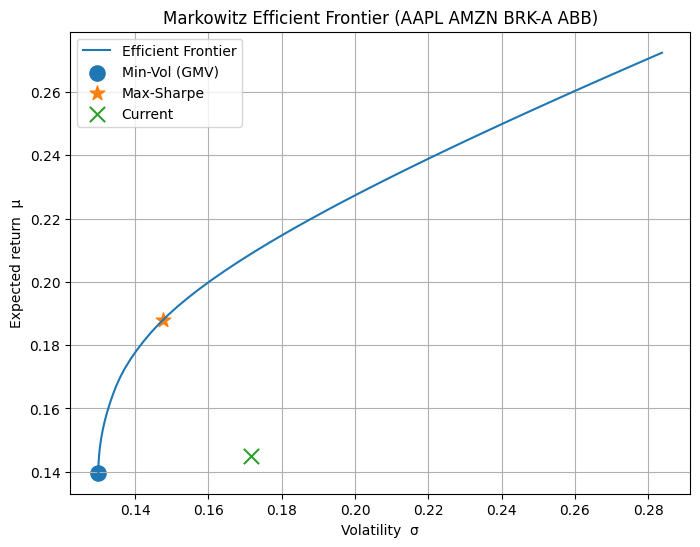

In [22]:
# This script illustrates the Markowitz workflow:

# 1. Load daily “close” prices for four stocks (AAPL, AMZN, BRK-A, ABB) from an Excel sheet that already contains the data.

# 2. Convert prices → daily **log-returns**.

# 3. Build the annualised vector of expected returns  μ  and the covariance matrix  Σ.

# 4. Evaluate the *current* portfolio (user-chosen weights).

# 5. Derive three portfolios along the efficient frontier:
     # Global Minimum-Variance  (GMV)
     # Tangency / Max-Sharpe    (risk-free rate = 0%)
     # 50 evenly-spaced points  (μ-σ pairs) for plotting the curve.

# 6. Visualise μ (return) on the y-axis versus σ (volatility) on the x-axis.

# Notation

# μ_i           = expected annual return of asset *i*
# Σ             = NxN covariance matrix (annualised)
# w             = weight vector (wᵢ ≥ 0, ∑wᵢ = 1)
# μ_p           = wᵀ μ
# σ²_p          = wᵀ Σ w
# σ_p           = sqrt(σ²_p)
# Sharpe_p      = (μ_p - r_f) / σ_p            (here r_f = 0)

# PEP 465       = introduced the `@` operator for matrix multiplication

# Efficient Frontier (Markowitz)

import pandas as pd # tabular data & time series
import numpy as np # fast numerical arrays / linear algebra
import matplotlib.pyplot as plt # charts
from pypfopt import EfficientFrontier # CVXPY-powered portfolio optimizer


# 1 Import, pivoted and filtered daily close prices

# 1.1 Read data from the specified sheet

raw_data_sheet=pd.read_excel(Portfolio_Analysis, sheet_name="Raw Data", parse_dates=["date"])

# parse_date: return a DatetimeIndex or a datetime64 column instead of raw numbers.

# 1.2 Pivot the dataframe

pivoted_raw_data=raw_data_sheet.pivot(index='date', columns='symbol', values='close')

# 1.3 Pivot only tha dataframe of APPL, AMZN, BRK-A, ABB

pivoted_raw_data_filtered=pivoted_raw_data[['AAPL', 'AMZN', 'BRK-A', 'ABB']]


# 2 Prices → log-returns → current portfolio performance

# 2.1 Calculate daily log return

log_close_return= np.log(pivoted_raw_data_filtered).diff().dropna()

# 2.2 Choose weights (must add to 1.0)

weights= pd.Series({'AAPL':0.5, 'AMZN':0.2, 'BRK-A':0.2,'ABB':0.1})

# 2.3 Calculate daily weighted returns

log_weighted_close_return=log_close_return.mul(weights, axis=1) # axis= 1 -> aligns on column names

# 2.4 Daily portfolio log-return series

log_perf_ptf=log_weighted_close_return.sum(axis=1)


# 3 Annualised statistics per securities

mu     = log_close_return.mean() * 252          # vector μ  (N×1) -> 252 trading days in US session per year
Sigma  = log_close_return.cov()   * 252         # matrix Σ (N×N)
Corr   = log_close_return.corr()                # matrix corr
std_dev = log_close_return.std() * np.sqrt(252) # vector σ (Nx1)


print (mu)
print (Sigma)
print (Corr)
print (std_dev)

# 4 Risk/return of the current portfolio

mu_ptf= (weights @ mu)               # wᵀ μ
sigma2= (weights @ Sigma @ weights)  # wᵀ Σ w -> σp^2​=(w1^2​)(σ1^2)​+(w2^2)(​σ2^2)​+(2w1​w2​Cov(1,2))
sigma_ptf = np.sqrt(sigma2)          # √var -> volatility

print (f"Current portfolio μ = {mu_ptf:.2%}   σ = {sigma_ptf:.2%}")

# 5 Efficient Frontier computations

# 5a Global Minimum-Variance (GMV) portfolio

ef_gmv = EfficientFrontier(mu, Sigma)    # long-only, fully-invested (defaults)
ef_gmv.min_volatility()                  # minimise σ
w_gmv = ef_gmv.clean_weights()           # zeroes out tiny weight values and rounds the rest to four decimal places; it’s purely for printing tidy, readable weights.
mu_gmv, sigma_gmv, _ = ef_gmv.portfolio_performance()

print (f"GMV portfolio μ = {mu_gmv:.2%}   σ = {sigma_gmv:.2%}")

# 5b Tangency / Max-Sharpe portfolio

ef_ts = EfficientFrontier(mu, Sigma)
ef_ts.max_sharpe(risk_free_rate=0.02)            # T-bill return
w_maxsharpe = ef_ts.clean_weights()              # zeroes out tiny weight values and rounds the rest to four decimal places; it’s purely for printing tidy, readable weights.
mu_ts, sigma_ts, sharpe_ts = ef_ts.portfolio_performance()

print (f"Max-Sharpe portfolio μ = {mu_ts:.2%}   σ = {sigma_ts:.2%} Sharpe = {sharpe_ts:.2f}")

# 5c Efficient frontier curve (50 points)

# Generate points for the efficient frontier by iterating through target returns
# Create a new EfficientFrontier instance for generating the curve

ef_curve = EfficientFrontier(mu, Sigma)

# Define a range of target returns
# A good range might be from the minimum volatility return to the maximum individual asset return, or slightly beyond.

target_returns = np.linspace(mu_gmv, mu.max(), 50)

# Generates 50 target-return values evenly spaced between the GMV portfolio’s expected return and the highest expected return among the individual securities.
# This gives a well-spread sampling of the entire efficient frontier.

frontier_sigma, frontier_mu = [], []

for r in target_returns:
    try:
        ef_curve.efficient_return(target_return=r)          # minimise σ for fixed μ=r and imposes the equality constraint w⊤μ=r and solves min ⁡w⊤Σw, i.e., the lowest possible volatility for that return.
        ret, vol, _ = ef_curve.portfolio_performance()      # reports the resulting (μ,σ)(μ,σ); we store them for plotting.
        frontier_sigma.append(vol)                          # σ
        frontier_mu.append(ret)                             # μ
    except (ValueError, AttributeError):
        # Some target μ may be infeasible; simply skip.
        pass

# 6 Plot      μ  on vertical,  σ  on horizontal

plt.figure(figsize=(8,6)) #
plt.plot(frontier_sigma, frontier_mu, label="Efficient Frontier")
plt.scatter(sigma_gmv, mu_gmv,  marker="o",  s=120, label="Min-Vol (GMV)")      # S specifies the marker size—more precisely, the area of each marker in typographic points squared (pt²)
plt.scatter(sigma_ts,  mu_ts,   marker="*",  s=120,label="Max-Sharpe")
plt.scatter(sigma_ptf, mu_ptf,  marker="x",  s=120,label="Current")
plt.xlabel("Volatility  σ")
plt.ylabel("Expected return  μ")
plt.title("Markowitz Efficient Frontier (AAPL AMZN BRK-A ABB)")
plt.grid(True)
plt.legend()
plt.show()


#Key take-aways

    # Current portfolio is inefficient

     # Both the GMV and Max-Sharpe portfolios lie above-and-to-the-left of your current point on the μ–σ plane, meaning they deliver a better return-per-unit-risk.

    # Global Minimum-Variance (GMV)

      # 24 % lower volatility (12.99 % vs 17.17 %).

      # Only 0.52 percentage-points lower expected return.

      # Sharpe improves from 0.84 → 1.08.
      # Use-case: if capital preservation and lower drawdowns are priorities, GMV is the safer upgrade.

    # Max-Sharpe (Tangency)

        # +4.31 percentage-points of expected return and -2.41 points of volatility versus the current mix—a strict improvement on both axes.

        # Highest Sharpe (1.14), clearing the “> 1” rule-of-thumb for an attractive risk-adjusted profile.
        # Use-case: suitable if you want to maximise growth while still cutting risk relative to today’s positioning.

    # Sharpe ratio perspective

        # < 1.0 → compensation for risk is mediocre.

        # 1.0 – 1.5 → solid; many professional portfolios aim here.

        # Your current 0.84 trails the two efficient alternatives.

In [23]:
# Data visualization

import plotly.express as px # interactive chart

# 1. Histogram plots: close returns distribution in 2017 and between 2012 and 2017

# print (close_return)

close_return_2017=close_return[close_return.index.year==2017]/100

# print (close_return_2017)

fig_returns_2017= px.histogram(close_return_2017)

fig_returns_2017.update_layout(
    title=dict(
        text="Returns distribution - 2017",
        x=0.5,            # 0 = left, 0.5 = center, 1 = right
        y=0.9,            # 0–1: vertical position inside the top margin
        xanchor="center",
        yanchor="top",
        font=dict(size=18)
    ),
    margin=dict(t=80)     # top margin in pixels (raise if you move y above 1)
)

fig_returns_2017.show()


fig_returns= px.histogram(close_return/100)

fig_returns.update_layout(
    title=dict(
        text="Returns distribution - 2012-2017",
        x=0.5,            # 0 = left, 0.5 = center, 1 = right
        y=0.9,            # 0–1: vertical position inside the top margin
        xanchor="center",
        yanchor="top",
        font=dict(size=18)
    ),
    margin=dict(t=80)     # top margin in pixels (raise if you move y above 1)
)

fig_returns.show()

# 2. Line plots: cumulative change between 2012 and 2017

# 2.1 Cumulative change using close returns

base_price = pivoted_raw_data_filtered.loc['2012-09-04']

scaled_returns=((close_return/100)+1).cumprod()  * 100 # Price index -> base day= 2012-09-04

fig_scaled_returns= px.line(scaled_returns)

fig_scaled_returns.update_layout(
    title=dict(
        text="Price index – base: 04-09-2012",
        x=0.5,            # 0 = left, 0.5 = center, 1 = right
        y=0.9,            # 0–1: vertical position inside the top margin
        xanchor="center",
        yanchor="top",
        font=dict(size=18)
    ),
    margin=dict(t=80)     # top margin in pixels (raise if you move y above 1)
)

fig_scaled_returns.show()
# fig_scaled_returns.write_html("fig_scaled_returns.html")

# 2.2 Cumulative change using prices

# Set base day

base_day = pivoted_raw_data_filtered.index[0]
base_price = pivoted_raw_data_filtered.loc['2012-09-04']

# Calculate index

prices_index = (pivoted_raw_data_filtered / base_price) * 100

print (prices_index)

fig_prices_index= px.line(prices_index)

fig_prices_index.update_layout(
    title=dict(
        text="Price index – base: 04-09-2012",
        x=0.5,            # 0 = left, 0.5 = center, 1 = right
        y=0.9,            # 0–1: vertical position inside the top margin
        xanchor="center",
        yanchor="top",
        font=dict(size=18)
    ),
    margin=dict(t=80)     # top margin in pixels (raise if you move y above 1)
)

fig_prices_index.show()
# fig_prices_index.write_html("fig_prices_index.html")

# Calculate cumulative change

cumulative_change_pct = (prices_index - 100)

print (cumulative_change_pct)

fig_cumulative_change_pct= px.line(cumulative_change_pct)

fig_cumulative_change_pct.update_layout(
    title=dict(
        text="Cumulative % change – base: 04-09-2012",
        x=0.5,            # 0 = left, 0.5 = center, 1 = right
        y=0.9,            # 0–1: vertical position inside the top margin
        xanchor="center",
        yanchor="top",
        font=dict(size=18)
    ),
    margin=dict(t=80)     # top margin in pixels (raise if you move y above 1)
)

fig_cumulative_change_pct.show()
# fig_cumulative_change_pct.write_html("fig_cumulative change pct.html")


symbol            AAPL        AMZN       BRK-A         ABB
date                                                      
2012-09-04  100.000000  100.000000  100.000000  100.000000
2012-09-05   99.297751   99.330320  101.180719  100.464037
2012-09-06  100.192602  101.411974  102.627515  103.886311
2012-09-07  100.810403  104.542525  102.900720  108.178654
2012-09-10   98.188063  103.715504  102.709081  107.540609
...                ...         ...         ...         ...
2017-08-28  167.457813  381.644344  212.256195  133.816705
2017-08-29  168.951216  384.887840  212.299749  132.946636
2017-08-30  169.407535  390.346138  214.144870  132.482599
2017-08-31  170.081633  395.594625  214.960524  134.454756
2017-09-01  170.133490  394.646595  214.653268  134.918794

[1258 rows x 4 columns]


symbol           AAPL        AMZN       BRK-A        ABB
date                                                    
2012-09-04   0.000000    0.000000    0.000000   0.000000
2012-09-05  -0.702249   -0.669680    1.180719   0.464037
2012-09-06   0.192602    1.411974    2.627515   3.886311
2012-09-07   0.810403    4.542525    2.900720   8.178654
2012-09-10  -1.811937    3.715504    2.709081   7.540609
...               ...         ...         ...        ...
2017-08-28  67.457813  281.644344  112.256195  33.816705
2017-08-29  68.951216  284.887840  112.299749  32.946636
2017-08-30  69.407535  290.346138  114.144870  32.482599
2017-08-31  70.081633  295.594625  114.960524  34.454756
2017-09-01  70.133490  294.646595  114.653268  34.918794

[1258 rows x 4 columns]


In [24]:
# Scatter plot

# Correlation return-risk between stocks in a base year (2014)

# 1. Calculate annual return and risk (volatility)

daily_close_return=pivoted_raw_data.pct_change(fill_method=None) #
daily_close_return_2014 = daily_close_return[daily_close_return.index.year==2014]
mean_daily_close_return_2014= daily_close_return_2014.mean()
daily_close_volatility_2014 = daily_close_return_2014.std()

annual_close_return_2014= mean_daily_close_return_2014* 252
annual_close_volatility_2014= daily_close_volatility_2014 * np.sqrt(252)

# print (daily_close_return)
# print (daily_close_return_2014)
# print (mean_daily_close_return_2014)
# print (daily_close_volatility_2014)
# print (annual_close_return_2014)
# print (annual_close_volatility_2014)

# 2. Create DataFrame return-risk

risk_return_2014 = pd.DataFrame(
    {"Return": annual_close_return_2014, "Risk": annual_close_volatility_2014}
).dropna()

# print (risk_return_2014)

# 3. Calculate correlation return-risk for 2014

corr = risk_return_2014["Return"].corr(risk_return_2014["Risk"])

print (f"Corr(Risk, Return) 2014 = {corr:.3f}")

# 4. Filter stocks by secot

import yfinance as yf

# Pull company metadata (sector, industry, fundamentals) and price history with simple calls

tickers = risk_return_2014.index.to_list()    # to_list turns that index into a plain Python list such as

# Lookup with yfinance

sector_map = {}
for tkr in tickers:
    try:
        sector_map[tkr] = yf.Ticker(tkr).info.get("sector", "Unknown")
    except Exception:
        sector_map[tkr] = "Unknown"

# Add column "Sector" to DataFRame risk-return by mapping each row index (ticker, symbol) through the sector_map dictionary.

risk_return_2014["Sector"] = risk_return_2014.index.map(sector_map)

print (risk_return_2014)

# 5. Scatter plot

# Copy the index (ticker/symbol) into a new column called "Symbol".
# Plotly Express, when you set text="Symbol", looks for a column with that name it doesn’t read the index. Without this column, the tickers wouldn’t appear as labels on the points.

risk_return_2014["Symbol"] = risk_return_2014.index

fig_risk_return_2014 = px.scatter(
    risk_return_2014,                                               # DataFrame with columns "Risk", "Return", "Symbol"
    x="Risk", y="Return", text="Symbol", color="Sector",            # map columns to X-axis, Y-axis, point label and color for sectors
    labels={"Risk": "Annualised σ", "Return": "Annualised μ"},      # custom axis labels shown in the figure
    title="Risk vs. Return – 2014 (by Sector)"                      # chart title
)

fig_risk_return_2014.update_traces(textposition="top center")       # where to place the text label relative to each marker
fig_risk_return_2014.update_layout(
    title=dict(
        text="Risk vs Return – 2014 by sector",
        x=0.5,
        xanchor="center"
    )
)

fig_risk_return_2014.show()
# fig_risk_return_2014.write_html("fig_risk_return_2014_sector.html")





Corr(Risk, Return) 2014 = 0.282
          Return      Risk                  Sector
symbol                                            
AAPL    0.343711  0.216793              Technology
ABB    -0.210838  0.182483                 Unknown
ABBV    0.245522  0.249210              Healthcare
AGFS   -0.037223  0.057272                 Unknown
AMZN   -0.197648  0.322211       Consumer Cyclical
BA     -0.030139  0.193384             Industrials
BHP    -0.340217  0.223652         Basic Materials
BP     -0.223177  0.198841                  Energy
BRK-A   0.247838  0.130055      Financial Services
BSAC   -0.155057  0.215632      Financial Services
BUD     0.069630  0.179262      Consumer Defensive
C       0.058525  0.204355      Financial Services
CELG    0.326708  0.303504                 Unknown
CHTR    0.227542  0.245349  Communication Services
CODI   -0.169435  0.196687             Industrials
DUK     0.201862  0.146569               Utilities
FB      0.418970  0.356905                 Unknown

In [27]:
# DASHBOARD: Market Analyzer (two charts, one dropdown)

# 1. One-time installation

# !pip install dash plotly --quiet

# 2. Imports

import dash                                                       # core Dash framework
from dash import dcc, html, Input, Output                         # frequently-used components
import plotly.express as px                                       # plotting library (interactive)


# 3. Instantiate the Dash app

app = dash.Dash(__name__)                                         # __name__ allows gunicorn/Flask routing

# 4. Define the layout (HTML tree rendered by Dash)

app.layout = html.Div([
        # Page title
        html.H1("Market Analyzer", style={"textAlign": "center"}),

        # Graph component (initial figure = fig_prices_index)
        dcc.Graph(id="prices_index", figure=fig_prices_index),

        # Dropdown to pick which tickers to show
        html.Label("Select symbols:"),
        dcc.Dropdown(
            id="symbol_picker",
            options=[{"label": s, "value": s} for s in prices_index.columns],
            value=list(prices_index.columns),     # pre-select all symbols
            multi=True,                           # allow multiple selection
        ),
    ],
)

# 5. Callback: updates the graph whenever dropdown selection changes

# It is a reactive function that Dash runs automatically
# -> Inputs change  ➜  Dash calls the function
# -> Function returns something  ➜  Dash puts it in Outputs

@app.callback(
    Output("prices_index", "figure"),                           # where the result goes
    Input("symbol_picker", "value"),                            # what triggers the function
)
def update_chart(selected_symbols):
    """Return a new figure filtered to the chosen symbols"""
    if not selected_symbols:                                    # # nothing picked ➜ empty figure
        return px.line(title="No symbol selected")

    fig = px.line(                                              # rebuild the figure
        prices_index[selected_symbols],
        title="Price index – base 100 (04-09-2012)",
        labels={"value": "index", "date": "date"},
    )
    fig.update_layout(legend_title_text="symbol")              # legend title
    return fig                                                 # dash sends it to the <Graph>

# 6. Start the dev server (visit http://127.0.0.1:8050/)

if __name__ == "__main__":
    app.run(debug=True)                                        # debug=True = hot-reload & error overlay

<IPython.core.display.Javascript object>

In [26]:
!pip install dash plotly --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 73.9 MB/s eta 0:00:00
